In [107]:
import os

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.data import GroupNormalizer

# Used Yujie's cleaned version
DIR_BYID = '/media/user/12TB1/HanLi/GitHub/CMU11785-project/local_data/content/databyid'

ls_all_invest_ids = sorted([int(fn.split('.')[0]) for fn in os.listdir(os.path.join(DIR_BYID, 'target'))])

In [108]:
f_cols = [f"f_{i}" for i in range(300)]

# Read a subset for testing
n = 5
ls_dfs = []
for id in ls_all_invest_ids[:n]:
    df_f_id = pd.DataFrame(np.load(os.path.join(DIR_BYID, f'feats/{id}.npy')), columns=f_cols)
    df_t_id = pd.DataFrame(np.load(os.path.join(DIR_BYID, f'target/{id}.npy')), columns=['target'])
    df_f_id['investment_id'] = id
    ls_dfs.append(pd.concat([df_t_id, df_f_id], axis=1))

df = pd.concat(ls_dfs).reset_index().rename(columns={'index': 'time_id'})
df = df.sort_values(by=['time_id']) # sort by time before splitting
df_train, df_test = train_test_split(df, test_size=0.1, shuffle=False)
df_train, df_val = train_test_split(df_train, test_size=2/9, shuffle=False)

In [109]:

df_train

,time_id,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,...,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299,investment_id
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4880,0,0.000000,0.810802,-0.514115,0.742368,-0.616673,-0.194255,1.771210,1.428127,1.134144,...,0.912726,-0.734579,0.819155,0.941183,-0.387617,-1.087009,-0.929529,-0.974060,-0.343624,4
2440,0,-0.231040,0.810802,-0.514115,0.742368,-0.616673,-0.194255,1.771210,1.428127,1.134144,...,0.912726,-0.734579,0.819155,0.941183,-0.387617,-1.087009,-0.929529,-0.974060,-0.343624,2
3660,0,0.000000,0.810802,-0.514115,0.742368,-0.616673,-0.194255,1.771210,1.428127,1.134144,...,0.912726,-0.734579,0.819155,0.941183,-0.387617,-1.087009,-0.929529,-0.974060,-0.343624,3
1220,0,-0.300875,0.932573,0.113691,-0.402206,0.378386,-0.203938,-0.413469,0.965623,1.230508,...,-1.095620,0.200075,0.819155,0.941183,-0.086764,-1.087009,-1.044826,-0.287605,0.321566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,853,0.625438,0.125338,-0.784968,-0.026920,-0.332789,0.159759,-1.738487,-0.933227,-0.409914,...,-0.441070,-1.074331,-1.709144,0.333215,0.256185,-1.451273,1.051513,1.932738,0.274242,0
4513,853,0.007398,-3.592502,0.188260,-1.133362,-0.329699,0.431882,1.449003,1.444075,-1.126494,...,1.361796,-0.459043,0.860634,-0.921559,-0.009948,2.085927,-0.519973,-2.040276,0.799998,3
2073,853,0.000000,0.125338,-0.784968,-0.026920,-0.332789,0.159759,-1.738487,-0.933227,-0.409914,...,-0.441070,-1.074331,-1.709144,0.333215,0.256185,-1.451273,1.051513,1.932738,0.274242,1
5733,853,0.000000,-3.592502,0.188260,-1.133362,-0.329699,0.431882,1.449003,1.444075,-1.126494,...,1.361796,-0.459043,0.860634,-0.921559,-0.009948,2.085927,-0.519973,-2.040276,0.799998,4


In [118]:



# val_dataset = TimeSeriesDataSet(
#     df_val,
#     group_ids=["investment_id"],
#     target="target",
#     time_idx="time_id",
#     min_encoder_length=5,
#     max_encoder_length=5,
#     min_prediction_length=2,
#     max_prediction_length=2,
#     time_varying_unknown_reals=[f"f_{i}" for i in range(300)],
# )
# test_dataset = TimeSeriesDataSet(
#     df_test,
#     group_ids=["investment_id"],
#     target="target",
#     time_idx="time_id",
#     min_encoder_length=5,
#     max_encoder_length=5,
#     min_prediction_length=2,
#     max_prediction_length=2,
#     time_varying_unknown_reals=[f"f_{i}" for i in range(300)],
# )

# # convert the dataset to a dataloader
# dataloader = train_dataset.to_dataloader(batch_size=4)


/home/user/anaconda3/envs/11785_project/lib/python3.9/site-packages/pytorch_forecasting/data/encoders.py:721: UserWarning: scale is below 1e-7 - consider not centering the data or using data with higher variance for numerical stability
  warnings.warn(


### Try TemporalFusionTransformer

* https://towardsdatascience.com/temporal-fusion-transformer-a-primer-on-deep-forecasting-in-python-4eb37f3f3594

### Create dataset and dataloaders

In [120]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor

from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.metrics import QuantileLoss

# load data
# define dataset
max_encoder_length = 6
max_prediction_length = 1
training_cutoff = "YYYY-MM-DD"  # day for cutoff

# create validation and training dataset
batch_size = 64
max_prediction_length = 3
max_encoder_length = 24

# create the dataset from the pandas dataframe
train_dataset = TimeSeriesDataSet(
    df_train,
    group_ids=["investment_id"],
    target="target",
    time_idx="time_id",
    min_encoder_length=max_encoder_length // 2,
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    # static_reals=[],
    time_varying_unknown_reals=['target'] + [f"f_{i}" for i in range(300)],
    target_normalizer=GroupNormalizer(
        groups=["investment_id"], transformation="softplus"
    ),  # use softplus and normalize by group
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
)

val_dataset = TimeSeriesDataSet.from_dataset(train_dataset, df_train, predict=True, stop_randomization=True)

# create dataloaders for model
batch_size = 64  # set this between 32 to 128
train_dataloader = train_dataset.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = val_dataset.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)


/home/user/anaconda3/envs/11785_project/lib/python3.9/site-packages/pytorch_forecasting/data/encoders.py:721: UserWarning: scale is below 1e-7 - consider not centering the data or using data with higher variance for numerical stability
  warnings.warn(


### Find optimal learning rate

Global seed set to 42
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Number of parameters in network: 226.9k


Finding best initial lr:   1%|          | 1/100 [02:19<3:49:29, 139.08s/it]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
Finding best initial lr: 100%|██████████| 100/100 [01:19<00:00,  1.06it/s]Restoring states from the checkpoint path at /media/user/12TB1/HanLi/GitHub/CMU11785-project/src/.lr_find_4dce4619-5c87-406e-804a-43bf449b9113.ckpt
/home/user/anaconda3/envs/11785_project/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1721: UserWarning: Be aware that when using `ckpt_path`, callbacks used to create the checkpoint need to be provided during `Trainer` instantiation. Please add the following callbacks: ["ModelCheckpoint{'monitor': None, 'mode': 'min', 'every_n_train_steps': 0, 'every_n_epochs': 1, 'train_time_interval': None, 'save_on_train_epoch_end': None}"].
  rank_zero_warn(
Finding best initial lr: 100%|██████████| 100/100 [01:22<00:00,  1.20it/s]


suggested learning rate: 1.0471285480508992


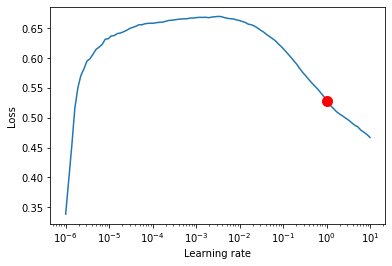

In [123]:
# configure network and trainer
pl.seed_everything(42)
trainer = pl.Trainer(
    gpus=1,
    # clipping gradients is a hyperparameter and important to prevent divergance
    # of the gradient for recurrent neural networks
    gradient_clip_val=0.1,
)

tft = TemporalFusionTransformer.from_dataset(
    train_dataset,
    # not meaningful for finding the learning rate but otherwise very important
    learning_rate=0.03,
    hidden_size=16,  # most important hyperparameter apart from learning rate
    # number of attention heads. Set to up to 4 for large datasets
    attention_head_size=1,
    dropout=0.1,  # between 0.1 and 0.3 are good values
    hidden_continuous_size=8,  # set to <= hidden_size
    output_size=7,  # 7 quantiles by default
    loss=QuantileLoss(),
    # reduce learning rate if no improvement in validation loss after x epochs
    reduce_on_plateau_patience=4,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")


# find optimal learning rate
res = trainer.tuner.lr_find(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
    max_lr=10.0,
    min_lr=1e-6,
)

print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

### Try DeepAR

In [101]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor

from pytorch_forecasting import TimeSeriesDataSet, DeepAR
from pytorch_forecasting.metrics import QuantileLoss

# load data
# define dataset
max_encoder_length = 6
max_prediction_length = 1
training_cutoff = "YYYY-MM-DD"  # day for cutoff

# create validation and training dataset
batch_size = 64
train_dataloader = train_dataset.to_dataloader(train=True, batch_size=batch_size, num_workers=2)
val_dataloader = val_dataset.to_dataloader(train=False, batch_size=batch_size, num_workers=2)

# define trainer with early stopping
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=1, verbose=False, mode="min")
lr_logger = LearningRateMonitor()
trainer = pl.Trainer(
    max_epochs=100,
    gpus=1,
    gradient_clip_val=0.1,
    limit_train_batches=30,
    callbacks=[lr_logger, early_stop_callback],
)

# create the model
model = DeepAR.from_dataset(
    train_dataset,
    allowed_encoder_known_variable_names=f_cols
    # learning_rate=1e-3,
    # hidden_size=32,
    # # attention_head_size=1,
    # dropout=0.1,
    # # hidden_continuous_size=16,
    # # output_size=1,
    # loss=QuantileLoss(),
    # log_interval=2,
    # reduce_on_plateau_patience=4
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

# find optimal learning rate (set limit_train_batches to 1.0 and log_interval = -1)
res = trainer.tuner.lr_find(
    model, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader, early_stop_threshold=100, max_lr=0.3,
)

print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

# # fit the model
# trainer.fit(
#     model, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader,
# )

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


AssertionError: Encoder and decoder variables have to be the same apart from target variable

In [99]:
# df_train

,time_id,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,...,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299,investment_id
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4880,0,0.000000,0.810802,-0.514115,0.742368,-0.616673,-0.194255,1.771210,1.428127,1.134144,...,0.912726,-0.734579,0.819155,0.941183,-0.387617,-1.087009,-0.929529,-0.974060,-0.343624,4
2440,0,-0.231040,0.810802,-0.514115,0.742368,-0.616673,-0.194255,1.771210,1.428127,1.134144,...,0.912726,-0.734579,0.819155,0.941183,-0.387617,-1.087009,-0.929529,-0.974060,-0.343624,2
3660,0,0.000000,0.810802,-0.514115,0.742368,-0.616673,-0.194255,1.771210,1.428127,1.134144,...,0.912726,-0.734579,0.819155,0.941183,-0.387617,-1.087009,-0.929529,-0.974060,-0.343624,3
1220,0,-0.300875,0.932573,0.113691,-0.402206,0.378386,-0.203938,-0.413469,0.965623,1.230508,...,-1.095620,0.200075,0.819155,0.941183,-0.086764,-1.087009,-1.044826,-0.287605,0.321566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,853,0.625438,0.125338,-0.784968,-0.026920,-0.332789,0.159759,-1.738487,-0.933227,-0.409914,...,-0.441070,-1.074331,-1.709144,0.333215,0.256185,-1.451273,1.051513,1.932738,0.274242,0
4513,853,0.007398,-3.592502,0.188260,-1.133362,-0.329699,0.431882,1.449003,1.444075,-1.126494,...,1.361796,-0.459043,0.860634,-0.921559,-0.009948,2.085927,-0.519973,-2.040276,0.799998,3
2073,853,0.000000,0.125338,-0.784968,-0.026920,-0.332789,0.159759,-1.738487,-0.933227,-0.409914,...,-0.441070,-1.074331,-1.709144,0.333215,0.256185,-1.451273,1.051513,1.932738,0.274242,1
5733,853,0.000000,-3.592502,0.188260,-1.133362,-0.329699,0.431882,1.449003,1.444075,-1.126494,...,1.361796,-0.459043,0.860634,-0.921559,-0.009948,2.085927,-0.519973,-2.040276,0.799998,4


In [100]:
model = DeepAR(
    cell_type='LSTM',
    hidden_size=32,
    rnn_layers=2,
    dropout=0.1,
    target='target',
    time_varying_reals_encoder=[],
    time_varying_reals_decoder=[],

)

/home/user/anaconda3/envs/11785_project/lib/python3.9/site-packages/pytorch_lightning/utilities/parsing.py:244: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/home/user/anaconda3/envs/11785_project/lib/python3.9/site-packages/pytorch_lightning/utilities/parsing.py:244: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  rank_zero_warn(


AssertionError: target target has to be real